In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


In [2]:
cards = [i for i in range(1, 14, 1)]

In [3]:
def get_dealer_cards():
    use_ace = 0
    current = 0
    showing_card = min(cards[random.randint(0, 12)], 10)
    current += showing_card
    if showing_card == 1:
        if use_ace == 0:
            use_ace = 1
            current += 10
    while current < 17:
        drawn = min(cards[random.randint(0, 12)], 10)
        if current + drawn > 21:
            if use_ace == 1:
                current = current + drawn - 10
                use_ace == 0
        else:
            current = current + drawn
    return current, showing_card
        


In [4]:
def gen_player_policy():
    policy = np.zeros((10,10,2))
    for current_sum in range(12, 22):
        for showing_card in range(0,10):
            for use_ace in range(0,2):
                if current_sum < 20 :
                    policy[current_sum - 12][showing_card][use_ace] = 1
    return policy
                    
    
def get_player_cards():
    use_ace = 0
    current = 0
    for i in range(2):
        drawn = min(cards[random.randint(0, 12)], 10)
        current += drawn
        if drawn == 1:
            if use_ace == 0:
                use_ace = 1
                current += 10
    while current < 12:
        current, s, use_ace = hit(current, 0, use_ace)
    
    return current, use_ace

def hit(current, showing_card, use_ace):
    drawn = min(cards[random.randint(0, 12)], 10)
    if current + drawn > 21:
        if use_ace == 1:
            current = current + drawn - 10
            use_ace == 0
    else:
        current = current + drawn
    return current, showing_card, use_ace

            
def get_state(current_sum, showing_card, use_ace):
    return current_sum * 10 + showing_card  + (use_ace*100)
        
def get_states(value):
    value = value - 1
    use_ace = 0
    if value >= 100:
        use_ace = 1
        value = value - 100
    showing_card = value%10
    current_sum = value/10
    return current_sum, showing_card, use_ace

def get_reward(player_current, dealer_current):
    reward = 0
    if player_current > 21:
        reward = -1
    elif dealer_current > 21:
        reward = 1
    else:
        if player_current > dealer_current:
            reward = 1
        if player_current < dealer_current:
            reward = -1
    return reward
                    
          
def simulate_blackjack(policy):
    S = []
    A = []
    R = []
    time = 0
    dealer_current, dealer_showing_card = get_dealer_cards()
    player_current, use_ace = get_player_cards()
    S.append(get_state(player_current- 12, dealer_showing_card - 1, use_ace))
    #print(player_current-12, dealer_showing_card-1, use_ace)
    #print(policy[player_current -12][dealer_showing_card-1][use_ace])
    A.append(policy[player_current- 12][dealer_showing_card - 1][use_ace])
    R.append(0)
    while player_current < 20:
        if A[time] == 1:
            player_current, dealer_showing_card, use_ace = hit(player_current, dealer_showing_card, use_ace)
            if player_current > 21:
                break
            S.append(get_state(player_current - 12, dealer_showing_card - 1, use_ace))
            A.append(policy[player_current- 12][dealer_showing_card-1][use_ace])
            R.append(0)
    R.append(get_reward(player_current, dealer_current))
    
    return S, A, R
                
    

In [5]:
episodes = 50000
gamma = 1
no_states = 200
def first_visit_MC_prediction(policy):
    V = np.zeros(no_states)
    Returns = []
    for i in range(no_states):
        Returns.append([])
    for i in range(episodes):
        S, A, R = simulate_blackjack(policy)
        G = 0 
        for state in range(len(S) - 1, -1, -1):
            G = G + gamma * R[state + 1]
            if S[state] in S[:state]:
                Returns[S[state]].append(G)
                V[S[state]] = np.mean(Returns[S[state]])      
    return V  

        

In [6]:
policy = gen_player_policy()
V = first_visit_MC_prediction(policy)

In [7]:
V1 = V[0:100].reshape(10, 10).transpose()
V1

array([[0.34090909, 0.33208955, 0.34162896, 0.37888199, 0.28955224,
        0.33228446, 0.34356725, 0.3590034 , 0.        , 0.        ],
       [0.55729167, 0.64451827, 0.64439655, 0.61702128, 0.6076087 ,
        0.67232598, 0.6277087 , 0.63992329, 0.        , 0.        ],
       [0.69387755, 0.65949821, 0.62997658, 0.65833333, 0.66108787,
        0.56444716, 0.61122734, 0.61057284, 0.        , 0.        ],
       [0.705     , 0.58695652, 0.64976959, 0.6483705 , 0.61993769,
        0.61420345, 0.6207975 , 0.64941176, 0.        , 0.        ],
       [0.57961783, 0.5703125 , 0.66425121, 0.64132231, 0.56872636,
        0.58411215, 0.61643357, 0.56737357, 0.        , 0.        ],
       [0.58450704, 0.58545455, 0.5942029 , 0.61698718, 0.6301633 ,
        0.6658147 , 0.58656609, 0.64910159, 0.        , 0.        ],
       [0.75449102, 0.71626298, 0.72681704, 0.67614534, 0.73012552,
        0.76590488, 0.70697832, 0.73590814, 0.        , 0.        ],
       [0.6918239 , 0.67364017, 0.7058823

(10, 10)


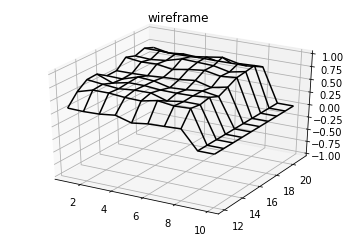

In [9]:
X = np.arange(1, 11)
Y = np.arange(12, 22)
X, Y = np.meshgrid(X, Y)
print(V1.shape)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, V1, color='black')
ax.set_title('wireframe');
ax.set_zlim(-1.01, 1.01)
plt.show()

(10, 10)


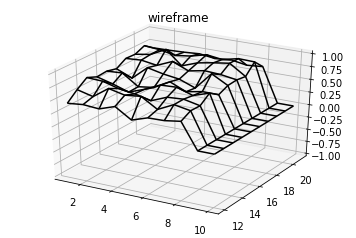

In [10]:
V2 = V[100:200].reshape(10, 10).transpose()
X = np.arange(1, 11)
Y = np.arange(12, 22)
X, Y = np.meshgrid(X, Y)
print(V1.shape)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, V2, color='black')
ax.set_title('wireframe');
ax.set_zlim(-1.01, 1.01)
plt.show()